<a href="https://colab.research.google.com/github/MigueLucena/Determinacion-Tipos-de-Estrellas/blob/main/Practica2NT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PABLO PÉREZ GARCÍA (100472243) MIGUEL LUCENA BELMONTE (100472277)**

**EJERCICIO 1: PROGRAMACIÓN DE K-MEANS Y COMPARACIÓN CON LA IMPLEMENTACIÓN DE SKLEARN**

*Usando el scaler StandardScaler:*

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def load_data(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

# Ejemplo de cómo utilizar la función
data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

def kmeans_programada(data, n_clusters, max_iters=300):
  #Se inicializan los centroides aleatoriamente
  centroids = data[np.random.choice(data.shape[0], n_clusters, replace = False)]

  for _ in range(max_iters):
        # Asignamos cada punto al centroide más cercano
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Actualizamos los centroides como la media de los puntos asignados a ellos
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Si los centroides no cambian, salimos del bucle
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        return centroids, labels


#Especificamos el número de clusters con el que se va a trabajar
n_clusters = 3

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[-0.61250534 -0.59862356 -0.45924676  1.08188488  0.02597403  0.02597403
   0.03896104  0.          0.          0.          0.          0.01298701
   0.77922078  0.05194805  0.01298701  0.          0.          0.01298701
   0.03896104  0.          0.          0.09090909  0.05194805  0.07792208
   0.          0.          0.77922078  0.        ]
 [ 0.26101484  1.29262374  1.26362162 -1.22513062  0.42857143  0.
   0.          0.          0.0952381   0.03174603  0.          0.
   0.41269841  0.03174603  0.          0.          0.          0.
   0.          0.          0.          0.03174603  0.11111111  0.
   0.01587302  0.03174603  0.3968254   0.41269841]
 [ 0.30718977 -0.35341281 -0.44246162 -0.06121906  0.27        0.08
   0.01        0.01        0.2         0.          0.01        0.
   0.26        0.01        0.          0.02        0.01        0.02
   0.          0.08        0.02        0.1         0.35        0.11
   0.          0.04

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


*Sin usar ningún scaler:*

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y aplicar codificación one-hot
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    if len(non_numeric_columns) > 0:
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])

        # Eliminar las columnas originales no numéricas
        data = data.drop(non_numeric_columns, axis=1)

        # Añadir los datos codificados al DataFrame original
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))
        data = pd.concat([data, encoded_columns], axis=1)

    return data.values

# Ejemplo de cómo utilizar la función
data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados de K-Means personalizado:
Centroides: [[ 1.57174655e+04  2.53859759e+05  6.03134603e+02 -7.55172414e+00
   5.17241379e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.89655172e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.96551724e-01  1.72413793e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.72413793e-02  1.20689655e-01  0.00000000e+00
   1.72413793e-02  1.72413793e-02  3.62068966e-01  4.65517241e-01]
 [ 8.03508333e+03  1.10106892e+04  6.92057174e+01  9.51864286e+00
   1.01190476e-01  5.95238095e-02  2.38095238e-02  5.95238095e-03
   1.19047619e-01  0.00000000e+00  5.95238095e-03  5.95238095e-03
   5.29761905e-01  2.97619048e-02  5.95238095e-03  1.19047619e-02
   5.95238095e-03  1.78571429e-02  1.78571429e-02  4.76190476e-02
   1.19047619e-02  1.01190476e-01  2.20238095e-01  1.01190476e-01
   0.00000000e+00  2.38095238e-02  5.29761905e-01  2.38095238e-02]
 [ 1.84202857e+04  6.5368

**EJERCICIO 2: CODIFICACIÓN DE ONE-HOT ENCODING Y CODIFICACIÓN COMO VARIABLE ORDINAL**

Resultados del k-means de sklearn con one-hot encoding:

In [17]:
start_time_onehot = time.time()
kmeans_onehot = KMeans(n_clusters=n_clusters)
labels_onehot = kmeans_onehot.fit_predict(data)
end_time_onehot = time.time()
onehot_time = end_time_onehot - start_time_onehot

silhouette_onehot = silhouette_score(data, labels_onehot)

print("\nResultados de K-Means usando One-Hot Encoding:")
print("Etiquetas:", labels_onehot)
print("Coeficiente de silueta:", silhouette_onehot)
print("Tiempo de ejecución:", onehot_time)


Resultados de K-Means usando One-Hot Encoding:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 1 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 0 0 0 0 2 2 0 0 2 1 2 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 1 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 0 1]
Coeficiente de silueta: 0.5925813744664216
Tiempo de ejecución: 0.06623458862304688


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados del k-means de sklearn codificando como variable ordinal:



In [15]:
from sklearn.preprocessing import OrdinalEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data = load_data("stars_data.csv")



start_time_ordinal = time.time()
kmeans_ordinal = KMeans(n_clusters=n_clusters)
labels_ordinal = kmeans_ordinal.fit_predict(data)
end_time_ordinal = time.time()
ordinal_time = end_time_ordinal - start_time_ordinal

silhouette_ordinal = silhouette_score(data, labels_ordinal)

print("\nResultados de K-Means usando One-Hot Encoding:")
print("Etiquetas:", labels_ordinal)
print("Coeficiente de silueta:", silhouette_ordinal)
print("Tiempo de ejecución:", ordinal_time)


Resultados de K-Means usando One-Hot Encoding:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 1 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 0 0 0 0 2 2 0 0 2 1 2 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 1 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 0 1]
Coeficiente de silueta: 0.5925813744664216
Tiempo de ejecución: 0.01399850845336914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Como se puede ver, el tiempo de ejecución usando el cifrado con OrdinalEncoder es menor que si usamos One-Hot Encoding.

**EJERCICIO 3: APLICACIÓN DE ALGORITMOS DE CLUSTERING**

*Carga de datos aplicando One-Hot Encoding:*



In [21]:

def load_data_onehot(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

# Ejemplo de cómo utilizar la función
data_onehot = load_data_onehot("stars_data.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Carga de datos usando OrdinalEncoder:*

In [28]:
def load_data_ordinal(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data_ordinal = load_data_ordinal("stars_data.csv")

*Aplicando Hierarchical Clustering:*

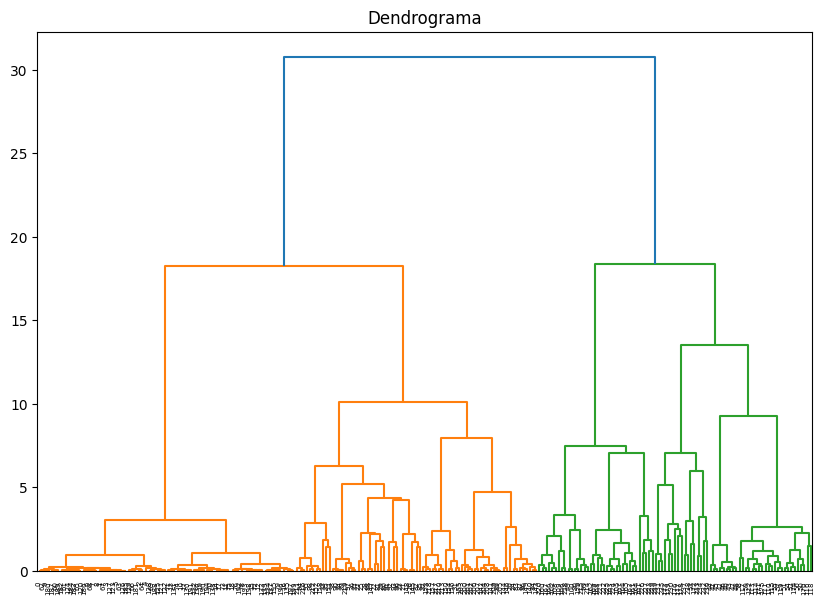

Resultados del clustering jerárquico:
[228 201 190 229 135 239 207 231 160 211 218 236 216 222 173 224 168 233
 198 202 191 170 187 162 163 143 172 165 217 215 145 138 237 159 208 203
 179 232  79 171 169 147 124 144 212 195 123 133 157  71 209 122 235 189
 221 175 161 129 149 131 210 213  85 150 152 238 118 204 214 227 115 197
 192 107 105  80 225 205 166 223 151 134 103 106 185 219 142  61 154 117
 177 182 140  52 194 220 136 141 155 120  70 164 130 158 183 108 125  98
 186 119 230 188 126  75 139 132 199 111 184 146  62 196  92  97 114  93
 234 110 109 193 104  95 101  91 116 200 156  96  64 226  59  66  69  34
  65 137 206 102 167  81 113 180  72  78  74 127 174  82  57  45 128  53
  47  84  30 121 178  48 148  58  51 112  83  77 181  68  55  35  63  31
 176  67  90  50  32  41  94  46 100  22  39  88 153  54  99  87  56  26
  89  33  60  40  27  25  44  43  38  73  29  86  36  15  16  19  23  49
  42  21   7  10  12  24  76  28  37  13  14  11  18  17   6  20   9   8
   4   3   5 

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Número de clusters a encontrar
labels_onehot = clustering.fit_predict(data_onehot)

linkage_matrix_onehot = linkage(data_onehot, method='ward')
# Generar un dendrograma para visualizar la jerarquía de clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
dendrogram(linkage_matrix_onehot)  # No necesitas pasar los datos reales, solo para visualizar la estructura jerárquica
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering jerárquico:")
print(labels_onehot)

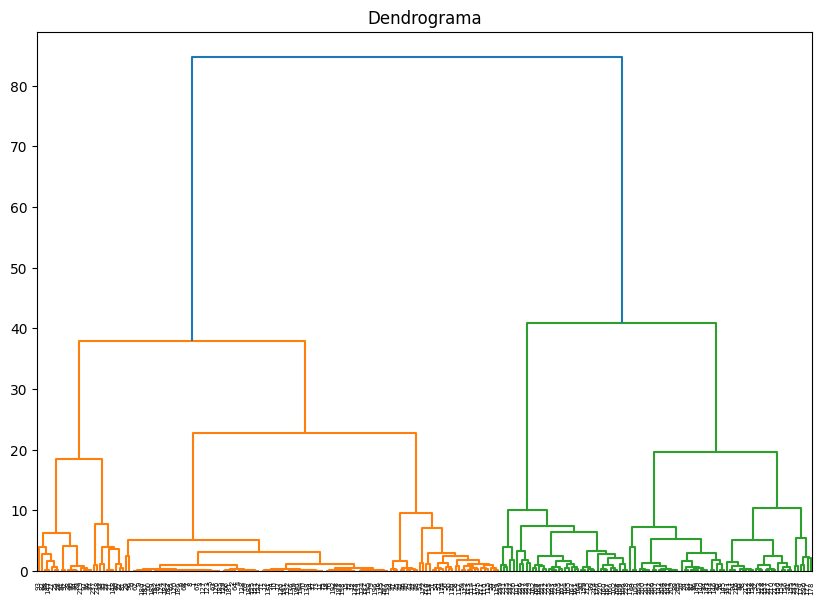

Resultados del clustering jerárquico:
[228 201 190 229 135 239 207 231 164 211 218 236 216 222 173 224 168 121
 198 202 187 170 189 162 163 143 172 165 161 139 145 138 237 125 208 159
 179 230 160 184 169 147 124 153 212 233 205 133 103 144 209 122 235 199
 123 175  79 129 149 131 210 213 178 166  71 238 118 203 214 227 232 197
 221 215 105 107 225 206  82 223 111 137 132 110 185 113 142  61 154 117
 177 182 150 183 194 219 136 141 155 120  76 226 130 158 186 217 126  58
  91 115 114 188 127 151 156  67 234 104 204  70  60 196  92 195  56  93
 116  98 220 193  51 192 101 152  57 200  75 108 176 112 119 134 140  66
  65  69 102 100 171  68 106  97 146 157  74  33 148  81  62  45 128  53
  96  84  78 181  88 180  73  87 109  55  37 191  32  48  63  77  30  64
  80  34  90  50  39 167  94  46  59  95  85  22  31  54  99  43  47  26
 174  72  29  40  28  52  89  19  38  35  27  86  36  15  18  44  42  49
  83  23  16  21  25  24  14  12  10  13   6  11   7   5   2  41  20  17
   8   9   4 

In [29]:
labels_ordinal = clustering.fit_predict(data_ordinal)

linkage_matrix_ordinal = linkage(data_ordinal, method='ward')
# Generar un dendrograma para visualizar la jerarquía de clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
dendrogram(linkage_matrix_ordinal)  # No necesitas pasar los datos reales, solo para visualizar la estructura jerárquica
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering jerárquico:")
print(labels_ordinal)